#                                     **EDA on Heart Disease**

<img src="https://media.istockphoto.com/id/1359314170/photo/heart-attack-and-heart-disease-3d-illustration.jpg?s=612x612&w=0&k=20&c=K5Y-yzsfs7a7CyuAw-B222EMkT04iRmiEWzhIqF0U9E=" alt="Heart Attack and Heart Disease" style="width: 800px; height: 500px;" ha="right">


# **Introduction to Analysis**

* The dataset contains information from 1988 and consists of four databases from different locations: Cleveland, Hungary, Switzerland, and Long Beach V. It includes 76 attributes, with the predicted attribute being the presence of heart disease in the patient. However, most published experiments focus on using a subset of 14 attributes for analysis and prediction.

* The "target" field in the dataset indicates the presence of heart disease in the patient. It is an integer-valued attribute, where 0 represents no disease and 1 represents the presence of heart disease. 

# **Causes of Heart diseases**

*  Heart disease is a serious condition that affects the heart and blood vessels. It is a leading cause of illness and death worldwide. The main cause of heart disease is the buildup of fatty deposits called plaque in the arteries, which can narrow and block blood flow to the heart. This can lead to chest pain, heart attacks, and other complications.

* There are several risk factors for heart disease, including high blood pressure, high cholesterol levels, smoking, diabetes, obesity, family history, age, gender, and stress. Living a healthy lifestyle, such as eating a balanced diet, staying physically active, avoiding smoking, and managing stress, can help reduce the risk of heart disease.

* Regular health check-ups and screenings are essential to detect heart disease early and get proper treatment. Taking care of our hearts is vital for a long and healthy life. By making small changes to our habits and managing risk factors, we can protect our hearts and improve our overall well-being. Remember, prevention is key, and taking care of our hearts is something we can start doing today.

In [22]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-dataset/heart.csv


# **Importing the dataset**

In [23]:
data=pd.read_csv("/kaggle/input/heart-disease-dataset/heart.csv")

# Lets check whether the data has null values

In [24]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [25]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


# **What age group is most vulnerable or has a large number of patients with a higher risk of heart attack and the count of heart attack occured ?**

In [26]:
def age_group(age):
    if age < 28:
        return "Under 28"
    elif age < 39:
        return "29-38"
    elif age < 49:
        return "39-48"
    elif age < 59:
        return "49-58"
    elif age < 69:
        return "59-68"
    else:
        return "69+"

# Adding a new column 'Age_Group' to the DataFrame
data['Age_Group'] = data['age'].apply(age_group)

# Grouping data by age group and calculating the number of patients with heart disease for each group
age_group_counts = data.groupby('Age_Group')['target'].sum()

# Finding the age group with the highest number of patients with heart disease
most_vulnerable_age_group = age_group_counts.idxmax()

# Counting the number of patients with heart disease in each age group
patients_with_heart_attack_count = age_group_counts.max()

print("The age group most vulnerable to heart attacks is:", most_vulnerable_age_group)
print("Number of patients with a heart attack in this age group:", patients_with_heart_attack_count,"members")



The age group most vulnerable to heart attacks is: 49-58
Number of patients with a heart attack in this age group: 200 members


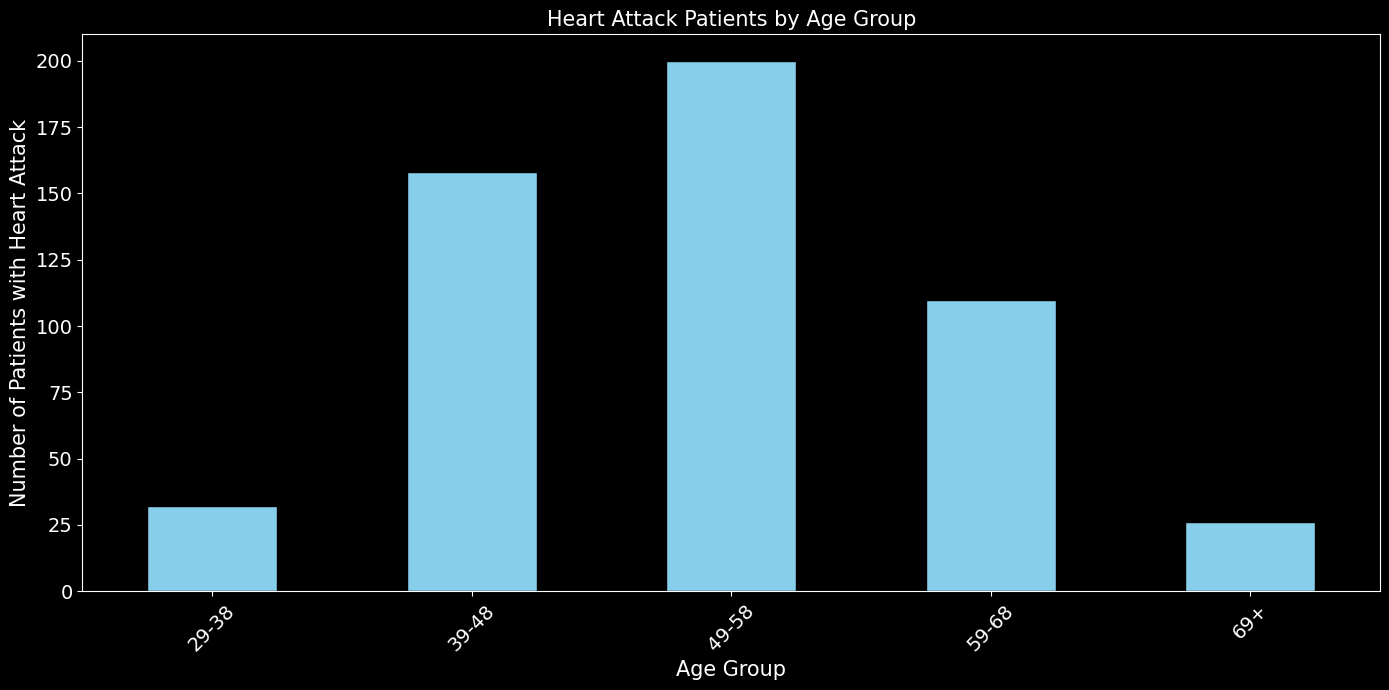

In [27]:
import matplotlib.pyplot as plt

age_group_counts.plot(kind='bar', color='skyblue', edgecolor='black',figsize=(14,7),fontsize=14)
plt.style.use("dark_background")
plt.xlabel('Age Group',fontsize=15)
plt.ylabel('Number of Patients with Heart Attack',fontsize=15)
plt.title('Heart Attack Patients by Age Group',fontsize=15)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

> **Observation:** The large number of patients with a higher risk of heart attack is for age group of **49-58** and Number of patients with a heart attack in this age group is **200** members (according to dataset)

# **Are men mostly prone to heart attacks or women?**

In [28]:
# Grouping data by gender and calculating the number of heart attack cases for each gender
gender_heart_attack_counts = data.groupby('sex')['target'].sum()

# Getting the total number of patients for each gender
total_patients_by_gender = data['sex'].value_counts()

# Calculating the proportion of heart attack cases for each gender
proportion_of_heart_attack_by_gender = gender_heart_attack_counts / total_patients_by_gender

# Determining whether men or women are mostly prone to heart attacks
most_prone_gender = 'Male' if proportion_of_heart_attack_by_gender[1] < proportion_of_heart_attack_by_gender[0] else 'Female'

# Getting the count of patients belonging to the gender that is mostly prone to heart attacks
count_most_prone_gender = gender_heart_attack_counts.max()

print("The gender mostly prone to heart attacks is:", most_prone_gender)
print("Count of patients belonging to this gender:", count_most_prone_gender)

The gender mostly prone to heart attacks is: Male
Count of patients belonging to this gender: 300


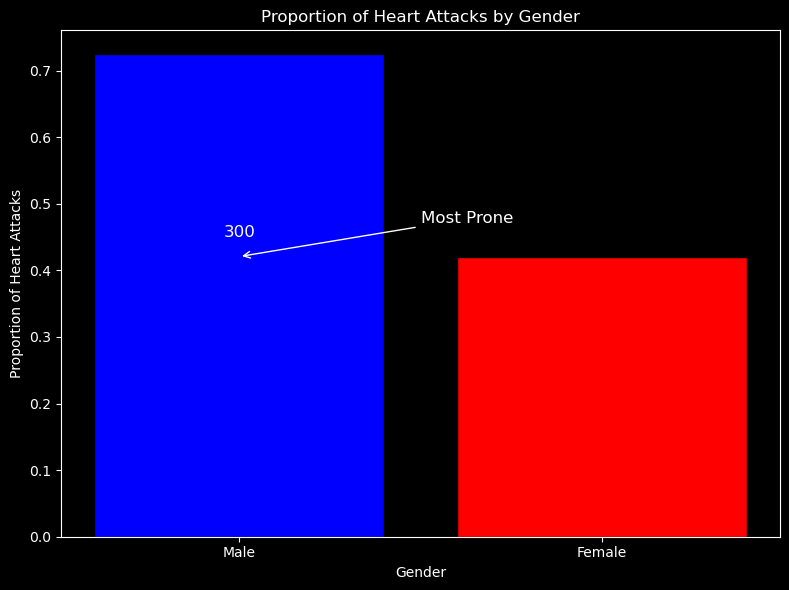

In [29]:
# Create a DataFrame to store the results for plotting
result_df = pd.DataFrame({
    'Gender': ['Male', 'Female'],
    'Proportion_of_Heart_Attacks': [proportion_of_heart_attack_by_gender[0], proportion_of_heart_attack_by_gender[1]],
    'Count_of_Heart_Attacks': [gender_heart_attack_counts[1], gender_heart_attack_counts[0]]
})

# Increase figsize for the plot
plt.figure(figsize=(8, 6))

# Create the bar plot
plt.bar(result_df['Gender'], result_df['Proportion_of_Heart_Attacks'], color=['blue', 'red'], edgecolor='black')
plt.xlabel('Gender')
plt.ylabel('Proportion of Heart Attacks')
plt.title('Proportion of Heart Attacks by Gender')
plt.xticks(rotation=0)


# Highlight the gender that is mostly prone to heart attacks
if most_prone_gender == 'Male':
    plt.annotate('Most Prone', xy=(0, proportion_of_heart_attack_by_gender[1]), xytext=(0.5, proportion_of_heart_attack_by_gender[1] + 0.05),
                 arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=12)
    plt.text(0, proportion_of_heart_attack_by_gender[1] + 0.03, str(count_most_prone_gender), ha='center', fontsize=12)
else:
    plt.annotate('Most Prone', xy=(1, proportion_of_heart_attack_by_gender[0]), xytext=(0.1, proportion_of_heart_attack_by_gender[0] + 0.05),
                 arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=12)
    plt.text(1, proportion_of_heart_attack_by_gender[0] + 0.03, str(count_most_prone_gender), ha='center', fontsize=12)

plt.tight_layout()
plt.show()


> **Observation:** The gender mostly prone to heart attacks is **Male(MEN)** and 
Count of patients belonging to this gender is **300** members

# **What chest pain types pose a severe risk of a heart attack?**


In [30]:
# Grouping data by chest pain type and calculating the number of heart attack cases for each type
chest_pain_attack_counts = data.groupby('cp')['target'].sum()

# Getting the total number of patients for each chest pain type
total_patients_by_chest_pain_type = data['cp'].value_counts()

# Calculating the proportion of heart attack cases for each chest pain type
proportion_of_heart_attack_by_chest_pain_type = chest_pain_attack_counts / total_patients_by_chest_pain_type

# Finding the chest pain type with the highest proportion of heart attack cases
most_severe_chest_pain_type = proportion_of_heart_attack_by_chest_pain_type.idxmax()

print("The chest pain type posing the most severe risk of a heart attack is:",most_severe_chest_pain_type)

The chest pain type posing the most severe risk of a heart attack is: 1


In [31]:
proportion_of_heart_attack_by_chest_pain_type

0    0.245473
1    0.802395
2    0.771127
3    0.662338
dtype: float64

In [32]:
total_patients_by_chest_pain_type

0    497
2    284
1    167
3     77
Name: cp, dtype: int64

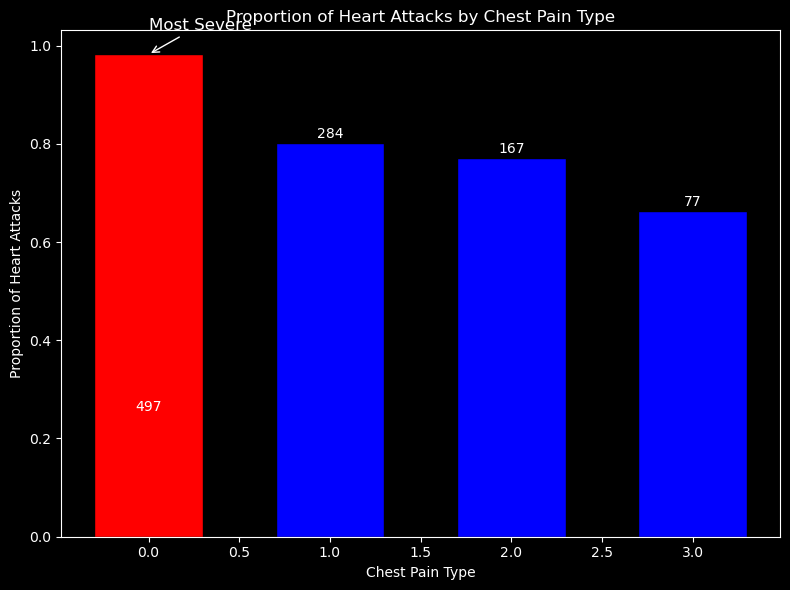

In [33]:
# Create a DataFrame to store the results for plotting
result_df = pd.DataFrame({
    'Chest_Pain_Type': chest_pain_attack_counts.index,
    'Proportion_of_Heart_Attacks': proportion_of_heart_attack_by_chest_pain_type.values,
    'Count_of_Chest_Pain': total_patients_by_chest_pain_type.values
})

# Find the chest pain type with the highest count
most_severe_index = result_df['Count_of_Chest_Pain'].idxmax()
most_severe_chest_pain_type = result_df.loc[most_severe_index, 'Chest_Pain_Type']

# Create the bar plot
plt.figure(figsize=(8, 6))

# Set the width and scaling factor for the bars
bar_width = 0.6
scaling_factor = 4  # Adjust this value to control the height of the bars


# Plot blue bars for all chest pain types
plt.bar(result_df['Chest_Pain_Type'], result_df['Proportion_of_Heart_Attacks'], color='blue', edgecolor='black', width=bar_width)

# Plot a red bar for the chest pain type with the highest count
plt.bar(most_severe_chest_pain_type, result_df.loc[most_severe_index, 'Proportion_of_Heart_Attacks'] * scaling_factor,
        color='red', edgecolor='black', width=bar_width)

plt.xlabel('Chest Pain Type')
plt.ylabel('Proportion of Heart Attacks')
plt.title('Proportion of Heart Attacks by Chest Pain Type')

# Display the count of chest pain cases above each bar
for index, value in enumerate(result_df['Count_of_Chest_Pain']):
    plt.text(index, result_df.loc[index, 'Proportion_of_Heart_Attacks'] + 0.01, str(value), ha='center', fontsize=10)

# Annotate the chest pain type with the highest count
plt.annotate('Most Severe', xy=(most_severe_chest_pain_type, result_df.loc[most_severe_index, 'Proportion_of_Heart_Attacks'] * scaling_factor),
             xytext=(most_severe_chest_pain_type, result_df.loc[most_severe_index, 'Proportion_of_Heart_Attacks'] * scaling_factor + 0.05),
             arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=12)

plt.tight_layout()
plt.show()




> **Observation** Cp (chest pain), is a ordinal feature with 4 values: Value 1: typical angina ,Value 2: atypical angina, Value 3: non-anginal pain , Value 4: asymptomatic.
The chest pain type posing the most severe risk of a heart attack is: **Typical angina**(According to dataset) and the mostly patients with chest pain is **497**


# **How fasting blood sugar is related to heart attack?**

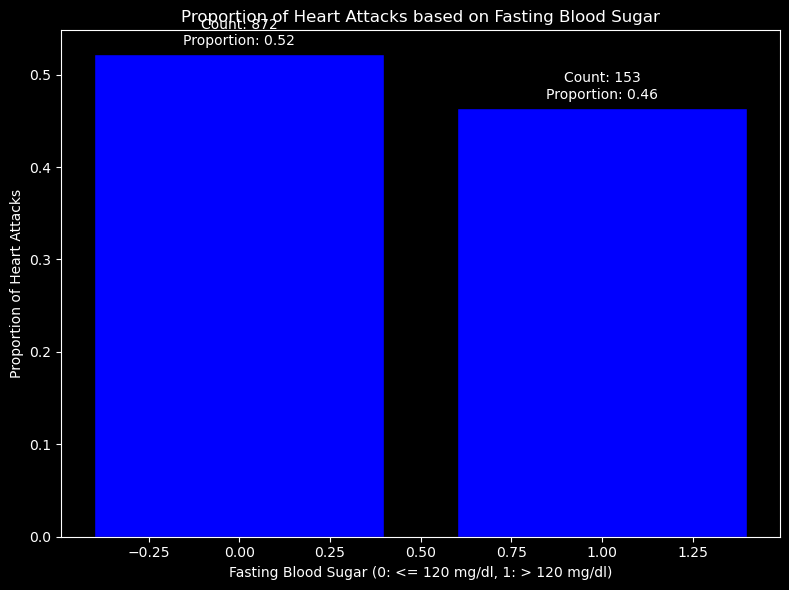

In [34]:
# Grouping data by fasting blood sugar and calculating the number of heart attack cases for each group
fbs_heart_attack_counts = data.groupby('fbs')['target'].sum()

# Getting the total number of patients for each fasting blood sugar group
total_patients_by_fbs = data['fbs'].value_counts()

# Calculating the proportion of heart attack cases for each fasting blood sugar group
proportion_of_heart_attack_by_fbs = fbs_heart_attack_counts / total_patients_by_fbs

# Create the bar plot to show the relationship between fasting blood sugar and heart attacks
plt.figure(figsize=(8, 6))
plt.bar(proportion_of_heart_attack_by_fbs.index, proportion_of_heart_attack_by_fbs.values, color='blue', edgecolor='black')
plt.xlabel('Fasting Blood Sugar (0: <= 120 mg/dl, 1: > 120 mg/dl)')
plt.ylabel('Proportion of Heart Attacks')
plt.title('Proportion of Heart Attacks based on Fasting Blood Sugar')

# Display the proportion above each bar
for index, value in enumerate(proportion_of_heart_attack_by_fbs.values):
    plt.text(index, value + 0.01, f'Count: {total_patients_by_fbs[index]}\nProportion: {value:.2f}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()


> **Observation:** Elevated fasting blood sugar levels, typically above **120 mg/dL**, are associated with an increased risk of heart attack. When blood sugar is consistently high, it can damage blood vessels and promote the buildup of plaque in the arteries. This narrowing of the arteries can lead to reduced blood flow to the heart, increasing the chance of a heart attack.


> 

# **What type of thalassemia severely leads to heart attack?**

In [35]:

# Grouping data by thalassemia type and calculating the number of heart attack cases for each group
thalassemia_heart_attack_counts = data.groupby('thal')['target'].sum()

# Grouping data by thalassemia type and getting the count of patients for each group
thalassemia_counts = data['thal'].value_counts()

# Getting the total number of patients for each thalassemia type
total_patients_by_thalassemia = data['thal'].value_counts()

# Calculating the proportion of heart attack cases for each thalassemia type
proportion_of_heart_attack_by_thalassemia = thalassemia_heart_attack_counts / total_patients_by_thalassemia

# Finding the thalassemia type with the highest proportion of heart attack cases
most_severe_thalassemia = proportion_of_heart_attack_by_thalassemia.idxmax()

print("The thalassemia type that severely leads to heart attacks is:", most_severe_thalassemia)
print("Count of patients for each thalassemia type:",thalassemia_counts)

The thalassemia type that severely leads to heart attacks is: 2
Count of patients for each thalassemia type: 2    544
3    410
1     64
0      7
Name: thal, dtype: int64


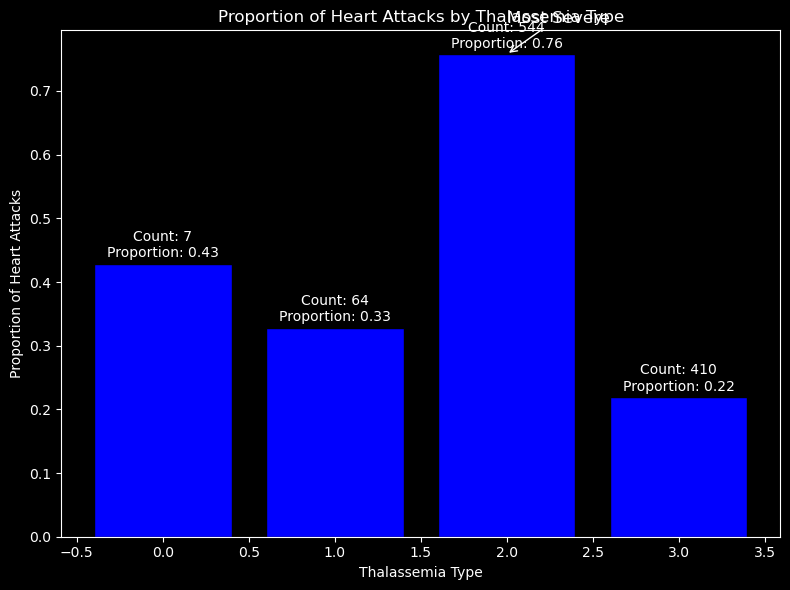

In [36]:
# Grouping data by thalassemia type and calculating the number of heart attack cases for each group
thalassemia_heart_attack_counts = data.groupby('thal')['target'].sum()

# Getting the total number of patients for each thalassemia type
total_patients_by_thalassemia = data['thal'].value_counts()

# Calculating the proportion of heart attack cases for each thalassemia type
proportion_of_heart_attack_by_thalassemia = thalassemia_heart_attack_counts / total_patients_by_thalassemia

# Finding the thalassemia type with the highest proportion of heart attack cases
most_severe_thalassemia = proportion_of_heart_attack_by_thalassemia.idxmax()

# Create the bar plot to show the relationship between thalassemia and heart attacks
plt.figure(figsize=(8, 6))
plt.bar(proportion_of_heart_attack_by_thalassemia.index, proportion_of_heart_attack_by_thalassemia.values, color='blue', edgecolor='black')
plt.xlabel('Thalassemia Type')
plt.ylabel('Proportion of Heart Attacks')
plt.title('Proportion of Heart Attacks by Thalassemia Type')

# Display the count of thalassemia cases above each bar
for index, value in enumerate(proportion_of_heart_attack_by_thalassemia.values):
    count_value = total_patients_by_thalassemia[proportion_of_heart_attack_by_thalassemia.index[index]]
    plt.text(index, value + 0.01, f'Count: {count_value}\nProportion: {value:.2f}', ha='center', fontsize=10)

# Annotate the thalassemia type that severely leads to heart attacks
plt.annotate('Most Severe', xy=(most_severe_thalassemia, proportion_of_heart_attack_by_thalassemia[most_severe_thalassemia]),
             xytext=(most_severe_thalassemia, proportion_of_heart_attack_by_thalassemia[most_severe_thalassemia] + 0.05),
             arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=12)

plt.tight_layout()
plt.show()


> **Observation:** Count of patients for each thalassemia type: **(2)**   **544**

# **Due to cholesterol, how many patients are at higher risk?**

In [37]:
# Define the cholesterol threshold for higher risk (e.g., > 200 mg/dL)
cholesterol_threshold = 190

# Count the number of patients at higher risk due to cholesterol
patients_at_higher_risk = data[data['chol'] > cholesterol_threshold].shape[0]

print("Number of patients at higher risk due to cholesterol:", patients_at_higher_risk)

Number of patients at higher risk due to cholesterol: 913


In [38]:
# Define the cholesterol ranges and corresponding labels
cholesterol_ranges = [
    {"label": "Near optimal", "min": 100, "max": 129},
    {"label": "Borderline high", "min": 130, "max": 159},
    {"label": "High", "min": 160, "max": 189},
    {"label": "Very high", "min": 190, "max": float("inf")}  # Use float("inf") for values equal to or higher than 190
]

# Initialize count dictionary for each cholesterol range
cholesterol_counts = {range_data["label"]: 0 for range_data in cholesterol_ranges}

# Count the number of patients in each cholesterol range
for range_data in cholesterol_ranges:
    count = data[(data['chol'] >= range_data["min"]) & (data['chol'] <= range_data["max"])].shape[0]
    cholesterol_counts[range_data["label"]] = count

# Print the count of patients in each cholesterol range
for label, count in cholesterol_counts.items():
    print(f"Number of patients in {label} range: {count}")


Number of patients in Near optimal range: 3
Number of patients in Borderline high range: 18
Number of patients in High range: 91
Number of patients in Very high range: 913


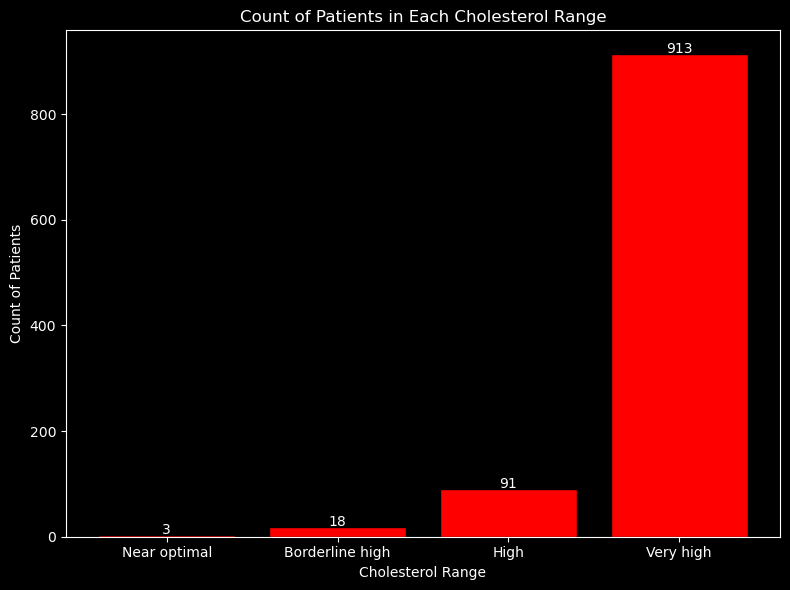

In [39]:
# Convert the count dictionary to a DataFrame for easy plotting
result_df = pd.DataFrame(list(cholesterol_counts.items()), columns=['Cholesterol Range', 'Count'])

# Create the bar plot to display the count of patients in each cholesterol range
plt.figure(figsize=(8, 6))
plt.bar(result_df['Cholesterol Range'], result_df['Count'], color='red', edgecolor='black')
plt.xlabel('Cholesterol Range')
plt.ylabel('Count of Patients')
plt.title('Count of Patients in Each Cholesterol Range')

# Display the count above each bar
for index, value in enumerate(result_df['Count']):
    plt.text(index, value + 2, str(value), ha='center', fontsize=10)

plt.tight_layout()
plt.show()


> **Observation:** Number of patients at higher risk due to cholesterol is **913**

*  Number of patients in Near optimal range: **3**
* Number of patients in Borderline high range: **18**
* Number of patients in High range: **91**
* Number of patients in Very high range: **913**

# **Summary**

After analyzing the data of heart disease ,we have come upon multiple conclusions. Let us look at them in the below points:

* High risk of attack is for age group of 49-58
* The gender mostly prone to heart attacks is Male
*  Men generally develop CVD at a younger age and have a higher risk of coronary heart disease (CHD) than women. Women, in contrast, are at a higher risk of stroke, which often occurs at older age
* It is important to note that any type of chest pain should be taken seriously, and medical attention should be sought if someone experiences chest pain, discomfort, or pressure, regardless of its classification. Chest pain can be a symptom of various heart-related or non-heart-related conditions, and proper evaluation by a healthcare professional is crucial to determine the cause and appropriate management. Prompt medical assessment can help identify any potential heart issues and initiate timely treatment, leading to better outcomes for the individual's overall health and well-being.
* Elevated fasting blood sugar levels, typically above 120 mg/dL, are associated with an increased risk of heart attack. When blood sugar is consistently high, it can damage blood vessels and promote the buildup of plaque in the arteries. This narrowing of the arteries can lead to reduced blood flow to the heart, increasing the chance of a heart attack. To reduce the risk, it's important to maintain healthy blood sugar levels through a balanced diet, regular exercise, and appropriate medical management if necessary.
* Thalassemia major, also known as Cooley's anemia, is the type of thalassemia that can severely lead to a heart attack. Thalassemia major is a genetic blood disorder where the body doesn't produce enough hemoglobin, a protein that carries oxygen in the red blood cells. The lack of sufficient hemoglobin leads to severe anemia and can strain the heart, causing it to work harder to pump oxygen throughout the body. Over time, this strain on the heart can increase the risk of heart problems, including heart attacks. Managing thalassemia major with regular blood transfusions and other treatments is essential to prevent complications and protect heart health.


![Image](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTst0bPCetb2YqQwuNRqVpwRTkoLozhhlyKCA&usqp=CAU)


[](http://)